In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load MRI file
mri_path = './data/OpenNeuro/ds000115/subjects/sub-01/anat/sub-01_T1w.nii.gz'  # Replace with your actual root path
mri_img = nib.load(mri_path)
mri_data = mri_img.get_fdata()

In [4]:
print("Data shape:", mri_data.shape)
print("Data type:", mri_data.dtype)
print("Affine transformation matrix:\n", mri_img.affine)

Data shape: (176, 256, 256)
Data type: float64
Affine transformation matrix:
 [[ 9.96775329e-01 -1.48763147e-03 -8.02301541e-02 -8.26823959e+01]
 [-2.98805232e-03  9.98446643e-01 -5.56366481e-02 -1.06932190e+02]
 [ 8.01882967e-02  5.56969717e-02  9.95222449e-01 -1.48407990e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [5]:
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
    plt.show()

slice_0 = mri_data[mri_data.shape[0] // 2, :, :]  # Sagittal slice
slice_1 = mri_data[:, mri_data.shape[1] // 2, :]  # Coronal slice
slice_2 = mri_data[:, :, mri_data.shape[2] // 2]  # Axial slice

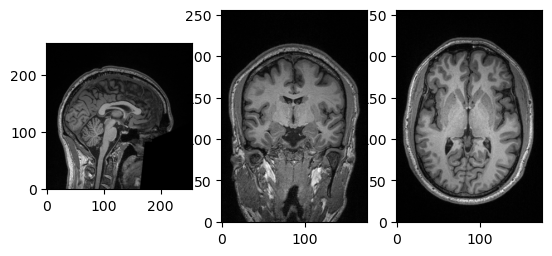

In [6]:
show_slices([slice_0, slice_1, slice_2])

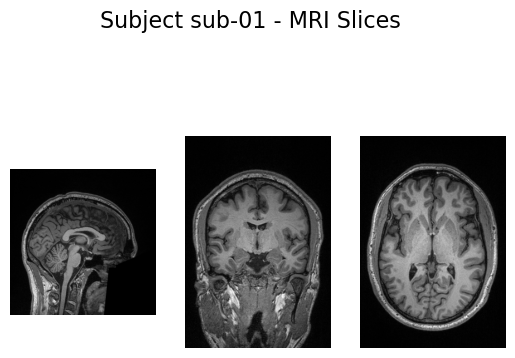

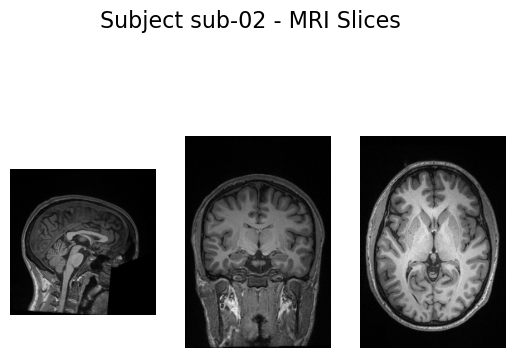

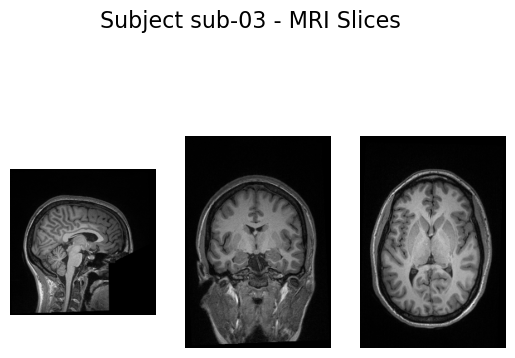

In [7]:
# Paths to subject MRI files (T1-weighted scans)
subject_paths = [
    './data/OpenNeuro/ds000115/subjects/sub-01/anat/sub-01_T1w.nii.gz',
    './data/OpenNeuro/ds000115/subjects/sub-02/anat/sub-02_T1w.nii.gz',
    './data/OpenNeuro/ds000115/subjects/sub-03/anat/sub-03_T1w.nii.gz'
]

# Function to display MRI slices
def show_slices(slices, subject_id):
    fig, axes = plt.subplots(1, len(slices))
    fig.suptitle(f"Subject {subject_id} - MRI Slices", fontsize=16)
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        axes[i].axis('off')
    plt.show()

# Loop through each subject's MRI file, load it, and display slices
for path in subject_paths:
    subject_id = path.split('/')[-3]  # Extract subject ID from path
    mri_img = nib.load(path)
    mri_data = mri_img.get_fdata()

    # Select slices from each axis
    slice_0 = mri_data[mri_data.shape[0] // 2, :, :]  # Sagittal slice
    slice_1 = mri_data[:, mri_data.shape[1] // 2, :]  # Coronal slice
    slice_2 = mri_data[:, :, mri_data.shape[2] // 2]  # Axial slice

    # Display the slices
    show_slices([slice_0, slice_1, slice_2], subject_id)

In [9]:
import nibabel as nib
import pandas as pd

# Load the anatomical T1-weighted MRI file
anat_mri_path = './data/OpenNeuro/ds000115/subjects/sub-66/anat/sub-66_T1w.nii.gz'
anat_mri_img = nib.load(anat_mri_path)

# Load the functional MRI files (0-back, 1-back, 2-back) and corresponding events .tsv files
func_mri_paths = {
    '0-back': './data/OpenNeuro/ds000115/subjects/sub-66/func/sub-66_task-letter0backtask_bold.nii.gz',
    '1-back': './data/OpenNeuro/ds000115/subjects/sub-66/func/sub-66_task-letter1backtask_bold.nii.gz',
    '2-back': './data/OpenNeuro/ds000115/subjects/sub-66/func/sub-66_task-letter2backtask_bold.nii.gz'
}
event_tsv_paths = {
    '0-back': './data/OpenNeuro/ds000115/subjects/sub-66/func/sub-66_task-letter0backtask_events.tsv',
    '1-back': './data/OpenNeuro/ds000115/subjects/sub-66/func/sub-66_task-letter1backtask_events.tsv',
    '2-back': './data/OpenNeuro/ds000115/subjects/sub-66/func/sub-66_task-letter2backtask_events.tsv'
}

# Load event .tsv files to check structure
event_data = {task: pd.read_csv(path, sep='\t') for task, path in event_tsv_paths.items()}

# Check MRI image shapes and event data structures
anat_mri_data_shape = anat_mri_img.shape
func_mri_data_shapes = {task: nib.load(path).shape for task, path in func_mri_paths.items()}
event_data_sample = {task: df.head() for task, df in event_data.items()}

print("Anatomical MRI Data Shape:", anat_mri_data_shape)
print("Functional MRI Data Shapes:", func_mri_data_shapes)
print("Event Data Sample:", event_data_sample)

Anatomical MRI Data Shape: (176, 256, 256)
Functional MRI Data Shapes: {'0-back': (64, 64, 36, 137), '1-back': (64, 64, 36, 137), '2-back': (64, 64, 36, 137)}
Event Data Sample: {'0-back':    onset  duration       trial_type  nback-nontarget  response_time
0   27.5  0.969071  nback-nontarget        -0.285714            0.0
1   32.5  0.969071  nback-nontarget        -0.285714            0.0
2   40.0  0.969071  nback-nontarget        -0.285714            0.0
3   42.5  0.969071  nback-nontarget         0.714286            0.0
4   47.5  0.969071  nback-nontarget        -0.285714            0.0, '1-back':    onset  duration       trial_type  nback-nontarget  response_time
0   27.5  0.914619  nback-nontarget        -0.285714            0.0
1   30.0  0.914619  nback-nontarget        -0.285714            0.0
2   35.0  0.914619  nback-nontarget         0.714286            0.0
3   42.5  0.914619  nback-nontarget         0.714286            0.0
4   47.5  0.914619  nback-nontarget        -0.285714